<a href="https://colab.research.google.com/github/stephenliu713/python_data-analysis/blob/main/03_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 为什么要数据可视化

> 为了清晰有效地传递信息，数据可视化使用统计图形、图表、信息图表和其他工具。可以使用点、线或条对数字数据进行编码，以便在视觉上传达定量信息。有效的可视化可以帮助用户分析和推理数据和证据。它使复杂的数据更容易理解和使用。

> 数据可视化既是一门艺术也是一门科学。

个人观点：

* 图对于人类来说更友好("一图胜千言")；

* 表格对于机器来说更友好

**可视化有很多种软件和解决方案**，它们中的很多比Python更易操作、更加美观，因此你不一定要用Python来解决。不过**Python在自动化输出图表方面有一定的优势**。


# 1. `matplotlib` —— 画各种数据图的好帮手

> `matplotlib`是Python及其数值计算库NumPy的绘图库。

与pandas的介绍类似，这里只涉及基本的使用逻辑和一些常用的简单操作。更复杂的功能请参考[matploblib官方技术文档](https://matplotlib.org/stable/contents.html)。

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

##### 魔法命令 `%`

IPython内核中有用一些魔法命令，这些指令独立于python语法，只能在jupyter notebook中使用，魔法命令可以完成一些特殊的功能。

In [4]:
# 下列的魔法命令是让jupyter在notebook内部显示创建的图表，而不是新建一个窗口显示。
%matplotlib inline

## 1.1 图表初始化 `fig, ax = plt.subplots()`


首先我们先用pandas读取一个csv文件作为示例。

In [7]:
df_gdp = pd.read_csv('data/gdp_components.csv')
df_gdp.head()

,date,gdp,inv,gov,ex,im
0,1929,104.556,17.170,9.622,5.939,5.556
1,1930,92.160,11.428,10.273,4.444,4.121
2,1931,77.391,6.549,10.169,2.906,2.905
3,1932,59.522,1.819,8.946,1.975,1.932
4,1933,57.154,2.276,8.875,1.987,1.929


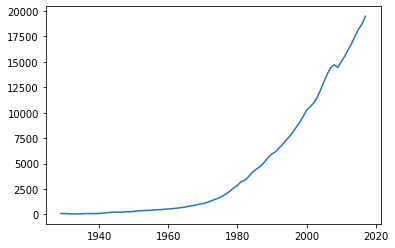

In [8]:
fig, ax = plt.subplots()

ax.plot(df_gdp['date'], df_gdp['gdp'])

plt.show()

## 1.2 自定义样式 `ax.plot(color, label, alpha, linestyle)`

`linestyle`: '-', '--', '-.', ':',''
`alpha`：float, 定义线条粗细

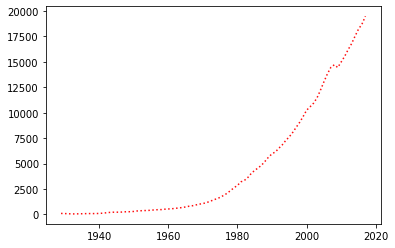

In [32]:
fig, ax = plt.subplots()

ax.plot(df_gdp['date'], df_gdp['gdp'],
        color = 'red',
        label = 'GDP',
        alpha = 15,
        linestyle = ':')

plt.show()

 ## 1.3 自定义标注及边框 `ax.set_ylabel`, `ax.set_xlabel`, `ax.set_title`, `ax.spines['top'/'bottom'/'left'/'right'].set_visible(False)`, `ax.text(x,y,s)`


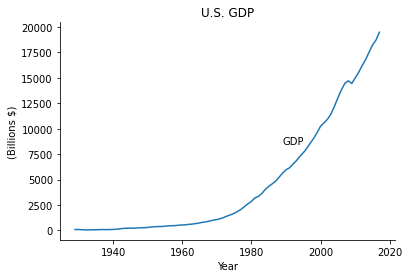

In [22]:
fig, ax = plt.subplots()

ax.plot(df_gdp['date'], df_gdp['gdp'])

# 设置x，y轴标签
ax.set_ylabel('(Billions $)')
ax.set_xlabel('Year')

# 设置标题
ax.set_title('U.S. GDP') 

# 设置上、右边框不可见
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

# 设置标签
ax.text(1989, 8500, 'GDP')

plt.show()

## 1.4 可视化图表的储存 `plt.savefig(filepath)`

`plt.savefig()`既支持保存png格式，也支持pdf格式。

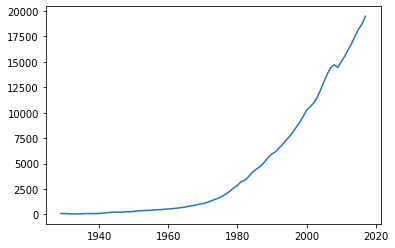

In [26]:
fig, ax = plt.subplots()

ax.plot(df_gdp['date'], df_gdp['gdp'])

# PDF
plt.savefig('gdp.pdf')

# PNG
plt.savefig('gdp.png')

plt.show()

## 1.5 直方图 Histograms `fig, ax = ax.hist(x, bins, color, alpha)`

`bins`：int或sequence或string

  *   int: 定义有多少个bins
  *   sequnce: 定义各个bins的起始与结束
  *   string: 选择已有策略: 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt'

`alpha`: ∈[0,1]



In [28]:
# 统计gdp增速
df_gdp['gdp_growth'] = df_gdp['gdp'].pct_change() * 100
df_gdp.head()

,date,gdp,inv,gov,ex,im,gdp_growth
0,1929,104.556,17.170,9.622,5.939,5.556,NaN
1,1930,92.160,11.428,10.273,4.444,4.121,-11.855848
2,1931,77.391,6.549,10.169,2.906,2.905,-16.025391
3,1932,59.522,1.819,8.946,1.975,1.932,-23.089248
4,1933,57.154,2.276,8.875,1.987,1.929,-3.978361


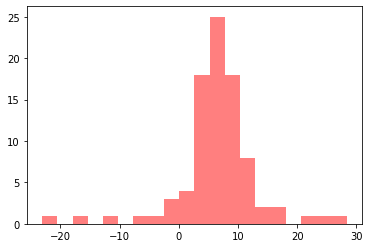

In [30]:
# bins为int

fig, ax = plt.subplots()

ax.hist(df_gdp['gdp_growth'].dropna(),
        bins = 20,
        color = 'red',
        alpha = 0.5)

plt.show()

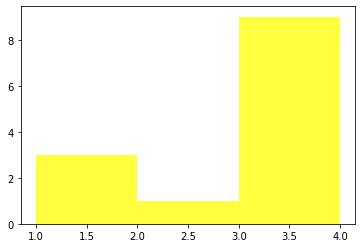

In [36]:
# bins为sequence

fig, ax = plt.subplots()

ax.hist(df_gdp['gdp_growth'].dropna(),
        bins = [1, 2, 3, 4], #三段bin的范围分别为[1,2),[2,3),[3,4]
        color = 'yellow',
        alpha = 0.75)

plt.show()

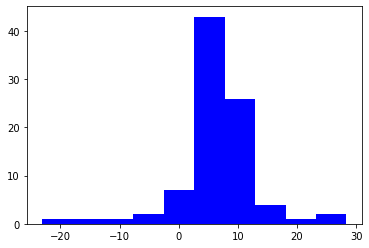

In [39]:
# bins为str

fig, ax = plt.subplots()

ax.hist(df_gdp['gdp_growth'].dropna(),
        bins = 'scott',
        color = 'blue',
        alpha = 1)

plt.show()

## 1.6 子图 Subplots `fig, ax = plt.subplots(row, col, figsize)`


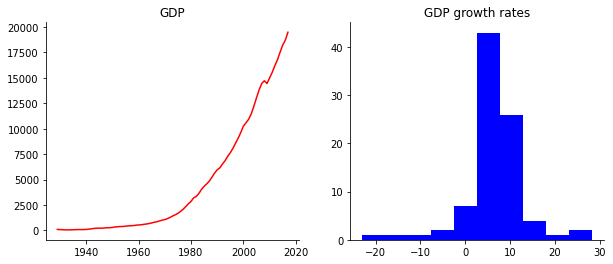

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# 第一张图
ax[0].plot(df_gdp['date'],df_gdp['gdp'],
           color = 'red',
           label = 'GDP')
ax[0].set_title('GDP')

# 第二张图
ax[1].hist(df_gdp['gdp_growth'],
           color = 'blue')
ax[1].set_title('GDP growth rates')

# 通过循环定义全部子图
for a in ax:
  a.spines['top'].set_visible(False)
  a.spines['right'].set_visible(False)

plt.show()

## 1.7 散点图 Scatter `ax.scatter(x, y)`

散点图往往能帮读者更直观的体会到两个变量之间可能存在的线性（或其他）关系。

In [49]:
# 选取2010-2019的GDP

df_gdp_1 = df_gdp[df_gdp['date']>=2010]
df_gdp_1.set_index('date',inplace=True)
df_gdp_1

,gdp,inv,gov,ex,im,gdp_growth
date,,,,,,
2010,14992.052,2165.473,3154.647,1846.280,2360.183,3.758894
2011,15542.582,2332.562,3148.372,2102.995,2682.456,3.672146
2012,16197.007,2621.754,3137.010,2191.280,2759.851,4.210529
2013,16784.851,2826.013,3132.409,2273.428,2764.210,3.629337
2014,17521.747,3038.931,3167.041,2371.027,2879.284,4.390245
2015,18219.297,3211.971,3234.210,2265.047,2786.461,3.981053
2016,18707.189,3169.887,3290.979,2217.576,2738.146,2.677886
2017,19485.394,3367.965,3374.444,2350.175,2928.596,4.159925


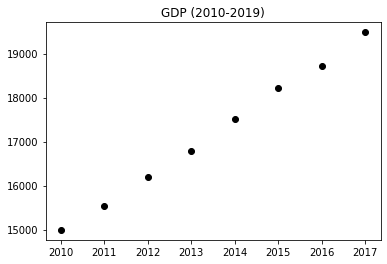

In [52]:
# 创建散点图

fig, ax = plt.subplots()

ax.scatter(df_gdp_1.index, df_gdp_1['gdp'],
           color = 'black')
ax.set_title('GDP (2010-2019)')

plt.show()

## 1.8 柱状图 Bar plots `ax.bar(x, y)`

柱状图适合比较同一量级上的数据。例如GDP增长在每20年间的平均值。

In [77]:
df_gdp_2 = df_gdp.set_index('date')

# 1920-2021按照20年间隔划分
df_gdp_2['gr_20yr'] = pd.cut(df_gdp_2.index, 
                             bins=range(1920,2021,20)) 
df_gdp_2

,gdp,inv,gov,ex,im,gdp_growth,gr_20yr
date,,,,,,,
1929,104.556,17.170,9.622,5.939,5.556,NaN,"(1920, 1940]"
1930,92.160,11.428,10.273,4.444,4.121,-11.855848,"(1920, 1940]"
1931,77.391,6.549,10.169,2.906,2.905,-16.025391,"(1920, 1940]"
1932,59.522,1.819,8.946,1.975,1.932,-23.089248,"(1920, 1940]"
1933,57.154,2.276,8.875,1.987,1.929,-3.978361,"(1920, 1940]"
...,...,...,...,...,...,...,...
2013,16784.851,2826.013,3132.409,2273.428,2764.210,3.629337,"(2000, 2020]"
2014,17521.747,3038.931,3167.041,2371.027,2879.284,4.390245,"(2000, 2020]"
2015,18219.297,3211.971,3234.210,2265.047,2786.461,3.981053,"(2000, 2020]"


In [78]:
# 以'gr_20yr'中的量为index计算平均值
df_gdp_20yr = df_gdp_2.groupby('gr_20yr').mean() 
df_gdp_20yr

,gdp,inv,gov,ex,im,gdp_growth
gr_20yr,,,,,,
"(1920, 1940]",82.778750,8.834833,11.764250,3.525333,3.182167,0.725608
"(1940, 1960]",333.143850,49.295250,81.340300,14.942200,12.910850,8.953970
"(1960, 1980]",1341.311650,240.384950,292.761300,95.245550,96.672500,8.688144
"(1980, 2000]",6244.898500,1124.944800,1220.329450,596.833750,704.544900,6.616591
"(2000, 2020]",14888.542235,2542.593294,2833.751353,1747.807941,2308.219471,3.867038


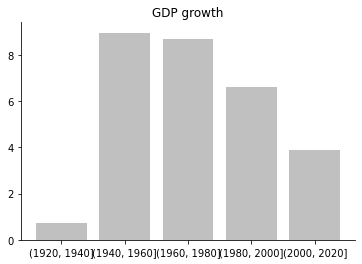

In [74]:
# 画柱状图

fig, ax = plt.subplots()

ax.bar(df_gdp_20yr.index.astype(str),df_gdp_20yr['gdp_growth'],
       color = 'silver')
ax.set_title('GDP growth')
sns.despine(ax=ax)


# 2. `seaborn` ——更复杂一些的作图库
> seaborn 是封装在matplotlib库之上的可视化库，这个库提供了丰富的可视化模板，使画图更加方便。



## 2.1 回归线 regression line `sns.regplot(x, y, data, ax, color, ci)`

如果散点图确实呈现了某种线性关系，加一条回归线会使整个图更加直观。这需要用到seaborn库的`sns.regplot()`。


In [53]:
import seaborn as sns

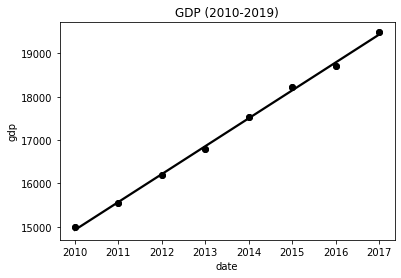

In [59]:
fig, ax = plt.subplots()

sns.regplot(x = df_gdp_1.index,
            y = 'gdp',
            data = df_gdp_1,
            ax = ax,
            color = 'black',
            ci = 0)
ax.scatter(df_gdp_1.index, df_gdp_1['gdp'],
           color = 'black')
ax.set_title('GDP (2010-2019)')

plt.show()

## 2.1.1 置信区间 confidence interval `ci`

`sns.regplot`中的`ci`代表统计学中的置信区间。我们尝试将它调整到95%。

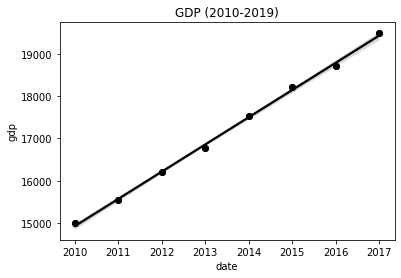

In [79]:
fig, ax = plt.subplots()

sns.regplot(x = df_gdp_1.index,
            y = 'gdp',
            data = df_gdp_1,
            ax = ax,
            color = 'black',
            ci = 95)                        # confidence interval → 95%
ax.scatter(df_gdp_1.index, df_gdp_1['gdp'],
           color = 'black')
ax.set_title('GDP (2010-2019)')

plt.show()

在这张图上的区别似乎不明显，不过你需要知道`sns.regplots()`能够定义置信区间`ci`。

## 2.2 泡泡图 Bubble plot `sns.regplot(scatter_kws={'s':data_var})`

泡泡图和散点图很类似，但是多了一个维度：每个“泡泡”的大小由另一个变量决定

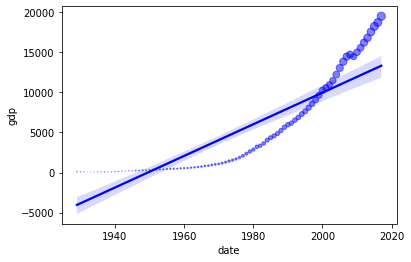

In [112]:
fig, ax = plt.subplots()

sns.regplot(x = 'date',
            y = 'gdp',
            data = df_gdp,
            scatter_kws = {'s':df_gdp['inv']/50,
                           'alpha':0.5},
            color = 'blue',
            ci = 95)

plt.show()

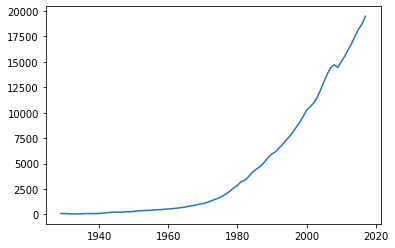

In [100]:
fig, ax = plt.subplots()

ax.plot(df_gdp['date'], df_gdp['gdp'])

plt.show()

## 2.3 双变量关系图 `sns.jointplot()`

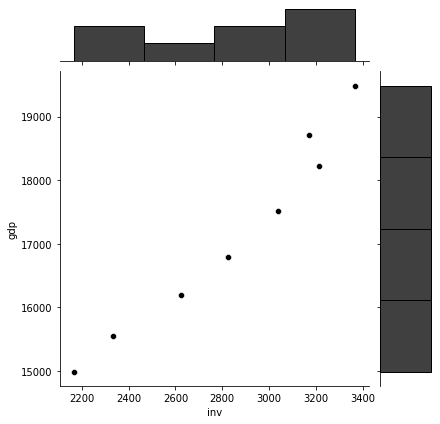

In [94]:
h = sns.jointplot(x = 'inv',
            y = 'gdp',
            data = df_gdp_1,
            kind = 'scatter',
            color = 'black',
            ci = 95)

plt.show()